In [9]:
#import libraries
import pandas as pd
import numpy as np 

In [10]:
#read csv
file_path = pd.read_csv("/Users/irislu/Downloads/datasets/traffic.csv")
data = file_path

In [11]:
#Exploratory
data.info()
data.describe()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


(226278, 9)

In [12]:
data.shape

(226278, 9)

In [13]:
#print the first five rows
data.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,8/21/21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,8/21/21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,8/21/21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,8/21/21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,8/21/21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [14]:
# 1: How many total pageview events did the links in the provided dataset receive in the full period, how many per day?
data["event"].value_counts()

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

In [15]:
# The total number of where event = 'pageview' 
data[data["event"]== "pageview"].shape[0]

142015

In [16]:
#using the groupby function to group the data by date
# step 1.fiter only for 'pageviews'
# step 2. group by date
# step 3. keep only the event column
data[data["event"]=='pageview'].groupby(by = 'date')["event"].count()


date
8/19/21    22366
8/20/21    21382
8/21/21    21349
8/22/21    20430
8/23/21    18646
8/24/21    18693
8/25/21    19149
Name: event, dtype: int64

In [17]:
# check if there's duplicated events
data_deduplicated = data.drop_duplicates()
data_deduplicated["event"].value_counts()

data_deduplicated[data_deduplicated["event"] == "pageview"]["event"].count()

data_deduplicated[data_deduplicated["event"] == "pageview"].groupby(by="date")["event"].count()

date
8/19/21    13006
8/20/21    11088
8/21/21     9939
8/22/21     9982
8/23/21     9722
8/24/21     9705
8/25/21     9918
Name: event, dtype: int64

In [18]:
# 2.Use the same method to see other events recorded in the dataset
event_record = set(data["event"].unique())
#remove the event= pageview data which we used before
event_record.remove('pageview')
print(event_record)


{'click', 'preview'}


In [19]:
# use loop to get research of other two type of events
for event_record in event_record:
    total_events = data[data["event"]== event_record].shape[0]
    print(f"Total number of {event_record} is {total_events} ")
    data_1 = data[data["event"]== event_record].groupby(by = "date")["event"].count()
    print(f"{event_record} event distribution per day")
    print(data_1)

Total number of click is 55732 
click event distribution per day
date
8/19/21    9207
8/20/21    8508
8/21/21    8071
8/22/21    7854
8/23/21    7315
8/24/21    7301
8/25/21    7476
Name: event, dtype: int64
Total number of preview is 28531 
preview event distribution per day
date
8/19/21    3788
8/20/21    4222
8/21/21    4663
8/22/21    4349
8/23/21    3847
8/24/21    3840
8/25/21    3822
Name: event, dtype: int64


In [20]:
#which countries did the "clicks" events come from
data_3 = data[data["event"]== "click"]
print(data_3[["event","country"]])

       event        country
0      click   Saudi Arabia
1      click   Saudi Arabia
2      click          India
3      click         France
4      click       Maldives
...      ...            ...
83807  click   Saudi Arabia
83808  click  United States
83809  click        Bahrain
83810  click        Germany
83811  click          Italy

[55732 rows x 2 columns]


#find out the overall click rate 
click rate = click / page views
Group click rates by the linkid so we know the number of clicks for each link/page 

In [21]:
link_c = data[data["event"]=="click"].groupby(by = 'linkid')["event"].count().reset_index()
link_c = link_c.rename(columns={"event":"click"})

 The same for the pageviews

In [22]:
link_p = data[data["event"]=="pageview"].groupby(by = 'linkid')["event"].count().reset_index()
link_p = link_p.rename(columns={"event":"pageviews"})

check the two links

In [23]:
link_c.head()

,linkid,click
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [24]:
link_p.head()

,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


To get the click rate, we will need to first join two dataframes together, and then divide the number of clicks by the number of pageviews for each link id. 

In [25]:
df_q4 = pd.merge(left = link_c,right = link_p, on = "linkid", how = "inner" )

Define the new column"click rate"

In [26]:
df_q4["clickrate"]= df_q4["click"]/df_q4["pageviews"]

In [27]:
df_q4

,linkid,click,pageviews,clickrate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


#Get a sense of the distribution of each link id

In [28]:
df_q4["clickrate"].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: clickrate, dtype: float64

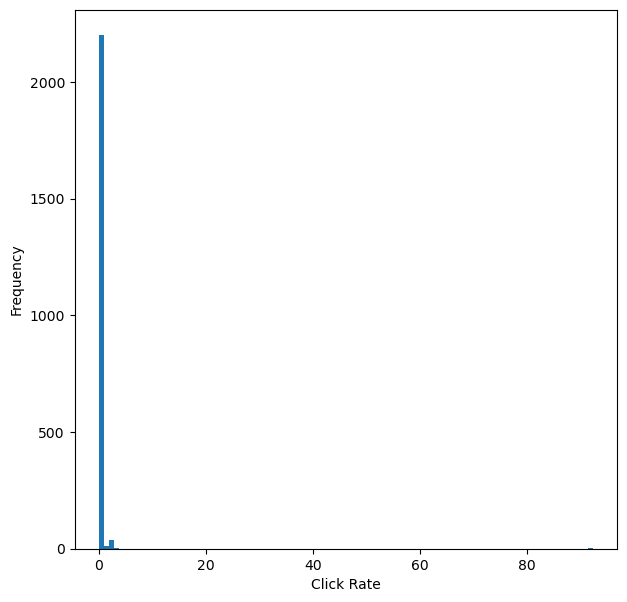

In [29]:
ax = df_q4["clickrate"].plot(kind='hist',figsize=(7,7),bins = 100 )
_ = ax.set_xlabel("Click Rate")

As the graph above shows that the data is highly skewed to left, with many data close to 0. Then a common approach now is to use
the log2() function in Numpy to plot the logarithm of the data.

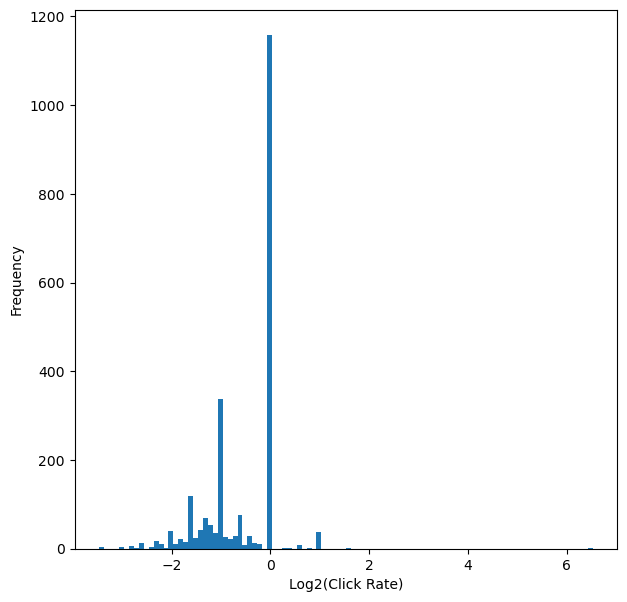

In [32]:
df_q4["clickrate_log2"]= np.log2(df_q4["clickrate"])
ax = df_q4["clickrate_log2"].plot(kind="hist",figsize=(7,7),bins= 100)
_ = ax.set_xlabel("Log2(Click Rate)")

We can see a spike at 0, meaning that the actual clickrate is equal to 1. When the clickrate = 1, it means many users view the page and click on the page in one session. 
While a majority of data is below 0, showing many users did not click on the page while viewing it. Thus for many pages, it has fewer click than pageviews. 

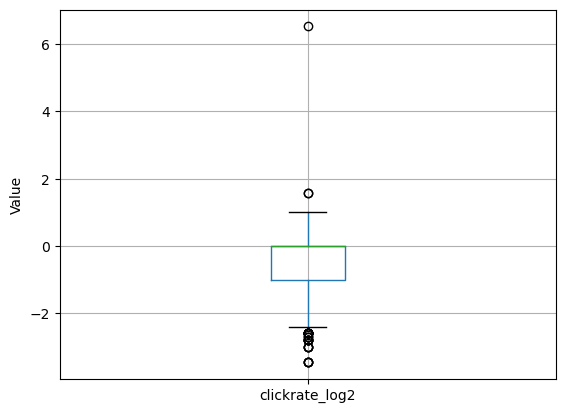

In [35]:
ax = df_q4.boxplot(column= "clickrate_log2")
_ = ax.set_ylabel("Value")

We can see two high outliers, and many lower outliers below Q1.
The two higher outliers can mean there are two links being clicked on on the same pageview. 